### Selenium
- a variety of tools and libraries enabling web automation.
- webdriver(웹 브라우저 조작)

In [1]:
from selenium import webdriver

# 지정한 웹 브라우저를 조작
driver = webdriver.Safari()
#webdriver.Chrome("/Users/yoon/Downloads/chromedriver")

In [21]:
login_info = ["ehc.1010", "davidho1358"]

In [17]:
# navigates to the given URL
url="https://naver.com"
driver.get(url) 

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.15"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobi
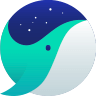
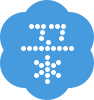

In [18]:
# Gets the source of the current page
html = driver.page_source
html

In [38]:
html = '''
<html>
<head>
</head>
<body>
    <h1> 우리동네시장</h1>
    <div class='sale'>
        <p id='fruits1' class='fruits'>
            <span class='name'> 바나나 </span>
            <span class='price'> 3000원 </span>
            <span class='inventory'> 500개 </span>
            <span class='store'> 가나다상회 </span>
            <a href='http://bit.ly/forPlaywithData'> 홈페이지 </a>
        </p>
    </div>
    <div class='prepare'>
        <p id='fruits2' class='fruits'>
            <span class='name'> 파인애플 </span>
            <span class='price'> 5000원 </span>
            <span class='inventory'> 100개 </span>
            <span class='store'> 라마바상회 </span>
            <a href='http://bit.ly/forPlaywithData'> 홈페이지 </a>
        </p>
    </div>
</body>
</html>
'''

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser")

In [40]:
tagSpan = soup.select("span")
tagP = soup.select("p")

In [41]:
soup.select("#fruits1")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [53]:
# price 클래스를 선택
price = soup.select(".price")
print(price)

# price 클래스를 가진 span 태그를 선택
price = soup.select("span[class='price']")
print(price)

# name 클래스를 가진 span 태그를 선택
print(soup.select("span.name"))

# 아이디가 fruits1인 태그의 children 중 name 클래스를 가진 span 태그를 선택
print(soup.select("#fruits1 > span.name"))

# sale 클래스를 가진 div 내의 children 중 아이디가 fruits1인 태그의 children 중 name 클래스를 가진 span 태그를 선택
print(soup.select("div.sale > #fruits1 > span.name"))

[<span class="price"> 3000원 </span>, <span class="price"> 5000원 </span>]
[<span class="price"> 3000원 </span>, <span class="price"> 5000원 </span>]
[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]
[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


In [60]:
# 반복문을 사용하여 출력
res = soup.select("span.name")

for r in res:
    print(r)
    
for i in range(len(res)):
    print(res[i])

<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>
<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>


# 멜론 차트 노래 제목 추출

In [79]:
url = "https://www.melon.com/chart/index.htm"
driver.get(url)

html = driver.page_source
song = BeautifulSoup(html, "html.parser")

In [123]:
songs = soup.select("tr")
songs

[<tr>
 <th scope="col">
 <div class="wrap t_right"><input class="input_check d_checkall" title="곡 목록 전체 선택" type="checkbox"/></div>
 </th>
 <th scope="col">
 <div class="wrap none">앨범이미지</div>
 </th>
 <th scope="col">
 <div class="wrap none">곡 상세가기</div>
 </th>
 <th scope="col">
 <div class="wrap pd_l_12">곡정보</div>
 </th>
 <th scope="col">
 <div class="wrap pd_l_12">앨범</div>
 </th>
 <th scope="col">
 <div class="wrap pd_l_30">좋아요</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">듣기</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">담기</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">다운</div>
 </th>
 <th scope="col">
 <div class="wrap t_center">뮤비</div>
 </th>
 </tr>,
 <tr data-song-no="32790516">
 <td><div class="wrap t_right"><input class="input_check" name="input_check" title="다시 여기 바닷가 곡 선택" type="checkbox" value="32790516"/></div></td>
 <td><div class="wrap">
 <a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10462799');" title="다시 여기 바닷

In [105]:
title = song.select("div.ellipsis.rank01 > span > a")[0].text
singer = song.select("div.ellipsis.rank02 > a")[0].text
print(title, singer)

다시 여기 바닷가 싹쓰리 (유두래곤, 린다G, 비룡)


## 멜론 차트 순위 정보 모두 가져오기
|제목|가수|
|:-:|:-:|
|다시 여기 바닷가 싹쓰리|유두래곤, 린다G, 비룡|

In [202]:
titles = song.select("div.ellipsis.rank01 > span > a")
singers = song.select("div.ellipsis.rank02 > span > a")

charts = {}
for i in range(len(titles)):
    print("{:} {:}".format(titles[i].text, singers[i].text), sep="|")
    

다시 여기 바닷가 싹쓰리 (유두래곤, 린다G, 비룡)
마리아 (Maria) 화사 (Hwa Sa)
그 여름을 틀어줘 싹쓰리 (유두래곤, 린다G, 비룡)
How You Like That BLACKPINK
Summer Hate (Feat. 비) 지코 (ZICO)
여름 안에서 by 싹쓰리 (Feat. 황광희) 싹쓰리 (유두래곤, 린다G, 비룡)
Downtown Baby 블루 (BLOO)
에잇(Prod.&Feat. SUGA of BTS) 아이유
LINDA (Feat. 윤미래) 린다G
홀로 이하이
아로하 조정석
신난다 (Feat. 마마무) 비룡
Dolphin 오마이걸
보라빛 밤 (pporappippam) 선미
살짝 설렜어 (Nonstop) 오마이걸
눈누난나 (NUNU NANA) 제시 (Jessi)
Dance Monkey Tones And I
사랑하게 될 줄 알았어 전미도
어떻게 지내 (Prod. By VAN.C) 오반
Memories Maroon 5
Into the I-LAND 아이유
METEOR 창모 (CHANGMO)
Blueming 아이유
Don't Start Now Dua Lipa
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야 장범준
아무노래 지코 (ZICO)
처음처럼 엠씨더맥스 (M.C the MAX)
MORE & MORE TWICE (트와이스)
PLAY (Feat. 창모) 청하
시작 가호 (Gaho)
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 AKMU (악동뮤지션)
Monster 레드벨벳-아이린&슬기
좋은 사람 있으면 소개시켜줘 조이 (JOY)
2002 Anne-Marie
나비와 고양이 (feat.백현 (BAEKHYUN)) 볼빨간사춘기
취기를 빌려 (취향저격 그녀 X 산들) 산들
늦은 밤 너의 집 앞 골목길에서 노을
사랑은 지날수록 더욱 선명하게 남아 전상근
오늘도 빛나는 너에게 (To You My Light) (Feat.이라온) 마크툽 (MAKTUB)
마음을 드려요 아이유
두리쥬와 (Feat. S.B.N) 유두래곤
모든 날, 모든 순간 (Every day, 

# 이미지 크롤링

```
in:
    검색어
    데이터 갯수
out:
    상위 이미지를 다운로드 후 특정 경로에 저장
````

In [5]:
from urllib.request import urlopen
from urllib.parse import quote_plus # 유니코드로 인코딩된 문자열을 리턴

base_url = "https://search.naver.com/search.naver?where=image&sm=tab_jum&query="

query = input("검색어: ")
num_data = int(input("데이터 갯수: "))

url = base_url + quote_plus(query)
html = urlopen(url)

soup = BeautifulSoup(html, "html.parser")
img = soup.find_all(class_="_img")

n = 1
for i in img:
    imgUrl = i['data-source']
    with urlopen(imgUrl) as f:
        with open("img/{}".format(query) + str(n) + ".jpg", "wb") as na:
            img = f.read()
            na.write(img)
    n += 1
    if n > num_data:
        break

검색어: 강아지
데이터 갯수: 10


## 인스타그램 크롤링

In [28]:
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import re

driver = webdriver.Chrome("/Users/yoon/Downloads/chromedriver")
base_url = "https://instagram.com/"

def instagram_login(login_info):
    driver.get(base_url)
    time.sleep(3)
    
    input_id = driver.find_elements_by_class_name("_2hvTZ.pexuQ.zyHYP")[0]
    input_id.clear()
    input_id.send_keys(login_info[0])

    input_pw = driver.find_elements_by_class_name("_2hvTZ.pexuQ.zyHYP")[1]
    input_pw.clear()
    input_pw.send_keys(login_info[1])
    input_pw.submit()
    time.sleep(5)
    
    save_info_btn = driver.find_element_by_class_name("sqdOP.L3NKy.y3zKF")
    save_info_btn.click()
    time.sleep(5)
    
    notifications_btn = driver.find_element_by_class_name("aOOlW.HoLwm")
    notifications_btn.click()
    time.sleep(5)
    
def instagram_search(query):
    query = input()
    search_url = base_url + "explore/tags/" + quote_plus(query)
    driver.get(search_url)

instagram_login(login_info)
instagram_search(query)

제주도맛집


'https://instagram.com/explore/tags/%EC%A0%9C%EC%A3%BC%EB%8F%84%EB%A7%9B%EC%A7%91'

In [33]:
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click() # 사진을 클릭한다
    time.sleep(2) # 사진이 로딩되는 시간동안 대기


def get_content(dirver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    try:
        content = soup.select("div.C4VMK > span")[0].text
    except:
        content = ""
    
    # content에서 해시태그만 가져오기
    hashtag = re.findall("#[^\s]+", content)
    
    # 작성일자 가져오기
    date = soup.select("time._1o9PC.Nzb55")[0]['datetime']
    
    # 좋아요 수 가져오기
    like = soup.select("div.Nm9Fw > button")[0].text[4:-1]
    
    # 위치정보 가져오기
    location = soup.select("div.M30cS")[0].text
    
    data = [hashtag, date, like, location]
    return data

select_first(driver)
print(get_content(driver))

[['#제주도맛집', '#애월맛집', '#제주전복', '#제주하복', '#하이엔드제주', '#제주맛집', '#서귀포맛집', '#애월맛집추천', '#한림맛집', '#한라산#제주전복맛집', '#제주카페', '#하복', '#제주맛집추천', '#제주공항근처맛집', '#제주공항맛집#모슬포맛집', '#성산맛집', '#제주전복죽#제주물회'], '2020-08-05T02:11:37.000Z', '3 like', '']
